### MA3402 Estadística
## Tarea 1, Entrega 3: Estimando con máxima verosimilitud.

**Profesor:** Joaquín Fontbona T.

**Auxiliares:** Javier Maass, Francisco Muñoz y Diego Olguín.

**Integrantes:** Gaspar Herreros y Tomás Ramírez.

## Unos escarabajitos

Para un estudio de un nuevo pesticida en la industria agrícola, se decidió probar la toxicidad de la sustancia química, exponiendo a escarabajos a diferentes concentraciones de la sustancia. Los datos asociados a estos experimentos vienen dados en el archivo $\texttt{datos\_pesticida.csv}$.

Este archivo contiene una tabla, donde la variable $\texttt{nExpuestos}$ es el número de escarabajos expuestos a la concentración correspondiente de pesticida y  $\texttt{nMuertos}$ es el número de escarabajos que efectivamente murieron bajo dicha concentración.

Nos interesará generar un modelo probabilístico con el que podamos estudiar la _efectividad_ de nuestro pesticida, es decir, qué tan probable es que se mate a la plaga dada una cierta concentración de la sustancia. 

Más específicamente, sea $Y$ la variable aleatoria binaria que vale $Y=1$ si un escarabajo muere bajo la concentración $x$ de sustancia, y vale $Y=0$ si no es así. Definimos $\pi(x) = \mathbb{P}(Y=1 | x)$, y nos interesará _estimar_ la forma de esta función, considerando los datos obtenidos de los experimentos.

**1.-** Lea el archivo $\texttt{datos\_pesticida.csv}$ y genere una columna llamada $\texttt{efectividad}$, en que se guarde, para cada valor de la concentración, qué tan efectivo fue el pesticida (i.e. cuántos escarabajos murieron del total que fue expuesto). Grafique la _efectividad_ en función de la _concentración_ de la sustancia (le podrá ser útil la función de ploteo definida aquí abajo).

In [ ]:
# Instalémos ggplot2 en caso de que no la tengamos
if(!(require(ggplot2))){install.packages('ggplot2')}
library(ggplot2) 

Loading required package: ggplot2



In [ ]:
lineas <- function(df, colx, coly,color='black'){
    pp <- ggplot(data=df, aes(x=!!sym(colx), y=!!sym(coly))) +
    geom_line(col=color) +
    geom_point() +
    labs(
        title='Efectividad (empírica) de la sustancia en función de la concentración',
        x = "Concentración",
        y = "Efectividad"
    )
    return(pp);
}

concentracion,nExpuestos,nMuertos,efectividad
<dbl>,<int>,<int>,<dbl>
1.70,60,5,0.08333333
1.72,60,12,0.20000000
1.75,62,19,0.30645161
1.79,60,29,0.48333333
1.80,60,51,0.85000000
1.84,60,54,0.90000000
1.86,65,62,0.95384615
1.89,65,65,1.00000000


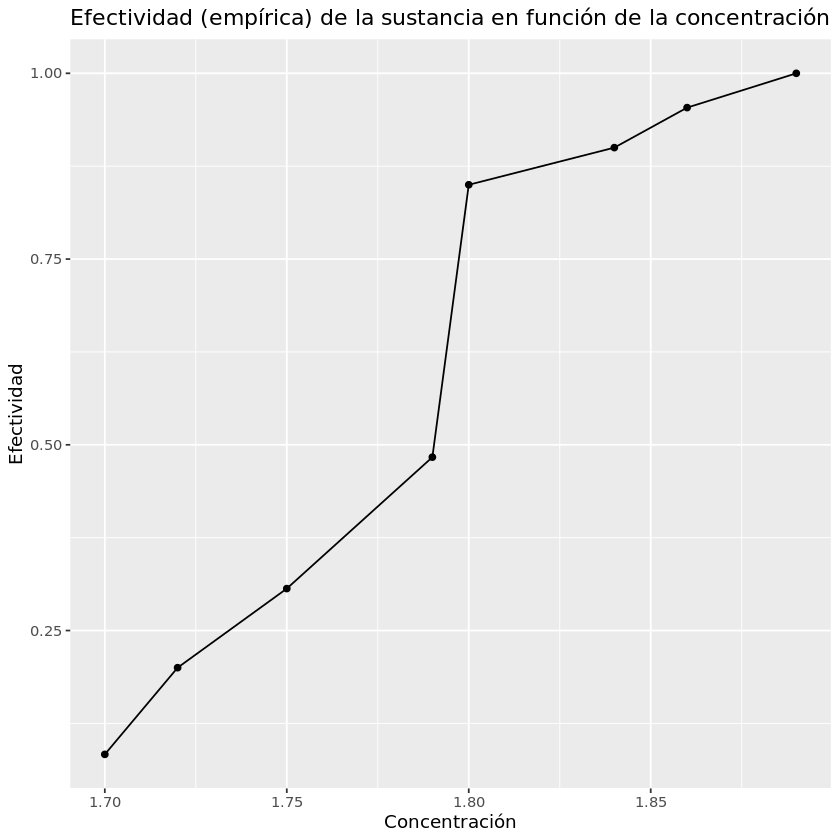

In [ ]:
# Leemos el archivo
datos.pesticida<-read.csv("datos_pesticida.csv")

# Calculamos la efectividad para cada fila
efectividad<-datos.pesticida$nMuertos/datos.pesticida$nExpuestos

# Guardamos la efectividad en una nueva columna
datos.pesticida<-cbind(datos.pesticida,efectividad)
datos.pesticida

# Graficamos
pp<-lineas(datos.pesticida, "concentracion", "efectividad")
pp

Note que este gráfico pareciera tener una forma de "S" (algo así como una sigmoide); por lo que tiene sentido pensar que hay un modelo _subyacente_ que nos podría permitir entender la relación entre la concentración y la _efectividad_ de forma "continua".

En particular, utilizaremos tres modelos diferentes para estimar la influencia de la toxicidad en la probabilidad de que un escarabajo se muera bajo una determinada concentración $x$ de sustancia:

- La probabilidad depende de la concentración a través de una función logística (de parámetros $\alpha_1, \beta_1$ por determinar):

$$\tilde{\pi}(x) = \frac{\exp(\alpha_1 + \beta_1 x)}{1 + \exp(\alpha_1 + \beta_1 x)}$$

- La probabilidad depende de $x$ a través de la función _probit_ (con parámetros $\alpha_2, \beta_2$ por determinar). Es decir, si $\phi$ es la función de **distribución** de una normal estándar (i.e. la integral de la densidad de la normal estándar), consideramos:
$$\hat{\pi}(x) = \phi(\alpha_2 + \beta_2 x)$$

- La probabilidad depende de $x$ a través de la función log-log complementaria (con parámetros $\alpha_3, \beta_3$ por determinar):

$$\bar{\pi}(x) = 1 - \exp(-\exp(\alpha_3 + \beta_3 x))$$


Para su comodidad, aquí definimos las funciones que intervendrán en este ejercicio:

In [ ]:
logistic <- function(alfa1, beta1, x){
  exp(alfa1 + beta1*x) / (1 + exp(alfa1 + beta1*x))  
}

probit <- function(alfa2, beta2, x){
  Vectorize(pnorm)(alfa2 + beta2*x,0,1)  
}

loglog <- function(alfa3, beta3, x){
  1 - exp(-exp(alfa3 + beta3*x))  
}

**2.-** Sin realizar ningún cálculo, escoja algunos valores de $\alpha_i$ y $\beta_i$ (para $i = 1, 2,3$) arbitrariamente. Grafique, en una misma figura, las funciones $\bar{\pi}, \tilde{\pi}, \hat{\pi}$ y la curva de _efectividad vs. concentración_ de antes. Intente que su elección de valores para $\alpha_i$ y $\beta_i$ sea tal que todas las curvas "se parezcan".

_Hint: Averigüe sobre la función $\texttt{geom\_function}$ de ggplot_

[1] "En negro se presentan los datos originales, y en rojo, azul y verde los estimadores logistic, probit y loglog respectivamente."


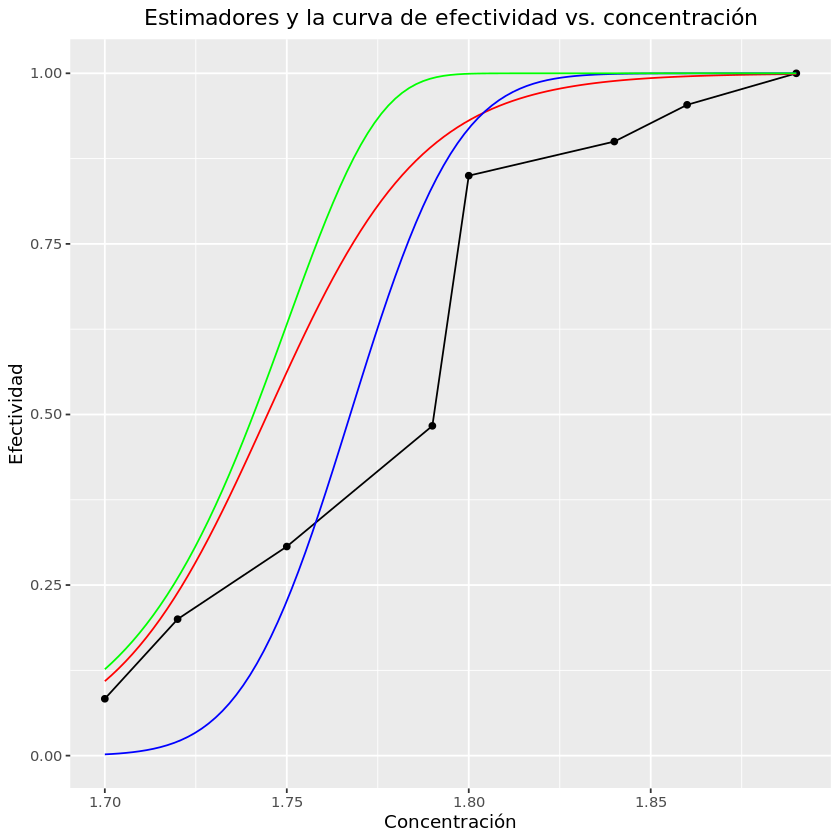

In [ ]:
# Definimos los valores de alfa_i y beta_i para i = 1,2,3
alfa1 = -82  
beta1 = 47
alfa2 = -76
beta2 = 43
alfa3 = -70
beta3 = 40

print("En negro se presentan los datos originales, y en rojo, azul y verde los estimadores logistic, probit y loglog respectivamente.")

# Graficamos lo pedido
pp + geom_function(fun = function(concentracion) logistic(alfa1,beta1,concentracion), color = "red") +
    geom_function(fun = function(concentracion) probit(alfa2,beta2,concentracion), color = "blue") +
    geom_function(fun = function(concentracion) loglog(alfa3,beta3,concentracion), color = "green") +
    ggtitle("Estimadores y la curva de efectividad vs. concentración") +
    theme(plot.title = element_text(hjust = 0.5))


**3.-** Recuerde la definición de _verosimilitud_ de un parámetro dada una muestra aleatoria.

**Respuesta:**

Se define la verosimilitud de un parámetro $\theta$ dada una MAS $\{X_i\}_{i=1}^N$ como la función:

$$\begin{aligned}\mathcal{L}:&\Theta\to\mathbb{R}\\&\theta\mapsto \mathcal{L}(\theta)=\prod_{i=1}^Np_{\theta}(X_i)\end{aligned}$$

Donde $p_\theta$ es la función de densidad asociada al parámetro $\theta$.

Sólo para clarificar, en nuestro caso, la tabla trae _varios experimentos agrupados_ según el nivel de concentración. Para cada valor de la concentración, se realizaron $\texttt{nExpuestos}$ experimentos, de los cuales $\texttt{nMuertos}$ corresponden a aquellos en que la v.a. vale $Y=1$ (i.e. el escarabajo murió). 

**4.-** Escriba la forma _general_ de la verosimilitud y log-verosimilitud para este problema de _clasificación binaria_. Para cada uno de los modelos propuestos, genere una función de R que calcule la log-verosimilitud de un modelo a partir de los datos contenidos en el archivo.

**Respuesta:**

Al tratarse de un problema de clasificación binaria, se tiene que la ley que posiblemente modele al experimento sea una Bernoulli de parametro $p$. Al obvservar los datos de *datos_pesticida.csv*, uno nota que la efectividad dice qué porcentaje de escarabajos murió, o en otras palabras, la frecuencia con la que la variable aleatoria $Y$ tomó el valor de $Y=1$. Esta frecuencia sería nuestro parametro $p$. Claramente, la efectividad depende de la cantidad de concentración del pesticida, y por las partes anteriores, se entiende que $\tilde{\pi} (x)$, $\hat{\pi} (x)$ y $\bar{\pi} (x)$ buscan estimar el parametro $p$ a partir de la concentración $x$. Como para cada concentración $x$, existen realizaciones del experimento, consideramos la función de verosimilitud como la multiplicación de densidad de bernoulli utilizando todos los experimentos realizados, es decir dependiente de un $x_k$ acompañado de $y_{kj}$, $j\in[n]$. Luego, la función general de la verosimilitud quedaría como

$$\mathcal{L}(\alpha_i,\beta_i)= \prod_{k=1}^N\prod_{j=1}^n \pi_i(\alpha_i,\beta_i,x_k)^{y_{kj}}(1-\pi_i(\alpha_i,\beta_i,x))^{1-y_{kj}}$$

Acá habría que para cada modelo reemplazar por $i=1,2,3$, con $\pi_1=\tilde{\pi}$, $\pi_2=\hat{\pi}$ y $\pi_3=\bar{\pi}$. Posteriormete, la log-verosimilitud está dada por

$$\mathcal{l}(\alpha_i,\beta_i)= \sum_{k=1}^N((\sum_{j=1}^n y_{kj})log(\pi_i(\alpha_i,\beta_i,x_k))+(n-\sum_{j=1}^n y_{kj})log(1-\pi_i(\alpha_i,\beta_i,x_k)))$$

In [ ]:
# Notar que en el data frame, nMuertos es lo mismo que la suma de los y_kj.

log_verosimilitud1<-function(data,par){
    with(data,sum(nMuertos*log(logistic(par[1],par[2],concentracion))+(nExpuestos-nMuertos)*log(1-logistic(par[1],par[2],concentracion))))
}

log_verosimilitud2<-function(data,par){
    with(data,sum(nMuertos*log(probit(par[1],par[2],concentracion))+(nExpuestos-nMuertos)*log(1-probit(par[1],par[2],concentracion))))
}

log_verosimilitud3<-function(data,par){
    with(data,sum(nMuertos*log(loglog(par[1],par[2],concentracion))+(nExpuestos-nMuertos)*log(1-loglog(par[1],par[2],concentracion))))
}

**5.-** Genere una visualización en 3D de las funciones de log-verosimilitud que queremos optimizar. 
_Hint: Para ello, utilice la librería $\texttt{rgl}$ y su función $\texttt{plot3d}$ (o si prefiere, plotly o alguna otra librería de visualización en R de más alto nivel)._

In [ ]:
install.packages("rgl")
library(rgl)

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)

Warning message in install.packages("rgl"):
“installation of package ‘rgl’ had non-zero exit status”
This build of rgl does not include OpenGL functions.  Use
 rglwidget() to display results, e.g. via options(rgl.printRglwidget = TRUE).



In [ ]:
# Generamos 200 valores aleatorios para alfa1 y beta1
n<-200
alfa1<-runif(n,-100,100)
beta1<-runif(n,-100,100)

# Generamos la log verosimilitud del primer estimador para los alfa1 y beta1 generados
z1<-numeric(n)
for (i in 1:n){
    z1[i]=log_verosimilitud1(datos.pesticida,c(alfa1[i],beta1[i]))
}
z1<-z1[!z1=="-Inf"]

# Graficamos
p<-plot3d(x=alfa1, y=beta1, z=z1, zlab='log verosimilitud', type = 's', size = 1.2, col = 'blue')
rglwidget()

HTML widgets cannot be represented in plain text (need html)

**6.-** Encuentre los estimadores de Máxima Verosimilitud para los parámetros $(\alpha_i, \beta_i)$ con $i = 1, 2, 3$ utilizando una función de optimización genérica de R (por ejemplo, la función $\texttt{optim}$). Repita el gráfico de la pregunta **2.-** pero ahora empleando los valores _óptimos_ de los parámetros. ¿Qué puede decir al respecto?

In [ ]:
# Definimos -log-versosimilitud, pues optim minimiza.
minus_logv1<-function(data,par){
    return(-1*log_verosimilitud1(data,par))
}	
minus_logv2<-function(data,par){
    return(-1*log_verosimilitud2(data,par))
}	
minus_logv3<-function(data,par){
    return(-1*log_verosimilitud3(data,par))
}	
resultado1 <- optim(par=c(0,0), fn=minus_logv1, data=datos.pesticida)
resultado2 <- optim(par=c(0,0), fn=minus_logv2, data=datos.pesticida)
resultado3 <- optim(par=c(0,0), fn=minus_logv3, data=datos.pesticida)

In [ ]:
# Guardamos los EVM
alfa1 = resultado1$par[1]  
beta1 = resultado1$par[2]
alfa2 = resultado2$par[1]  
beta2 = resultado2$par[2]
alfa3 = resultado3$par[1] 
beta3 = resultado3$par[2]

# Señalamos los valores de los EVM en pantalla
df.EVM<-data.frame(alfa1,beta1,alfa2,beta2,alfa3,beta3)
print("Los estimadores de Máxima Verosimilitud para los parámetros (alfa_i, beta_i) para i = 1,2,3 son:")
df.EVM

[1] "Los estimadores de Máxima Verosimilitud para los parámetros (alfa_i, beta_i) para i = 1,2,3 son:"


alfa1,beta1,alfa2,beta2,alfa3,beta3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-59.83858,33.77936,-34.60001,19.53237,-36.96235,20.57411


[1] "En negro se presentan los datos originales, y en rojo, azul y verde los estimadores logistic, probit y loglog respectivamente."


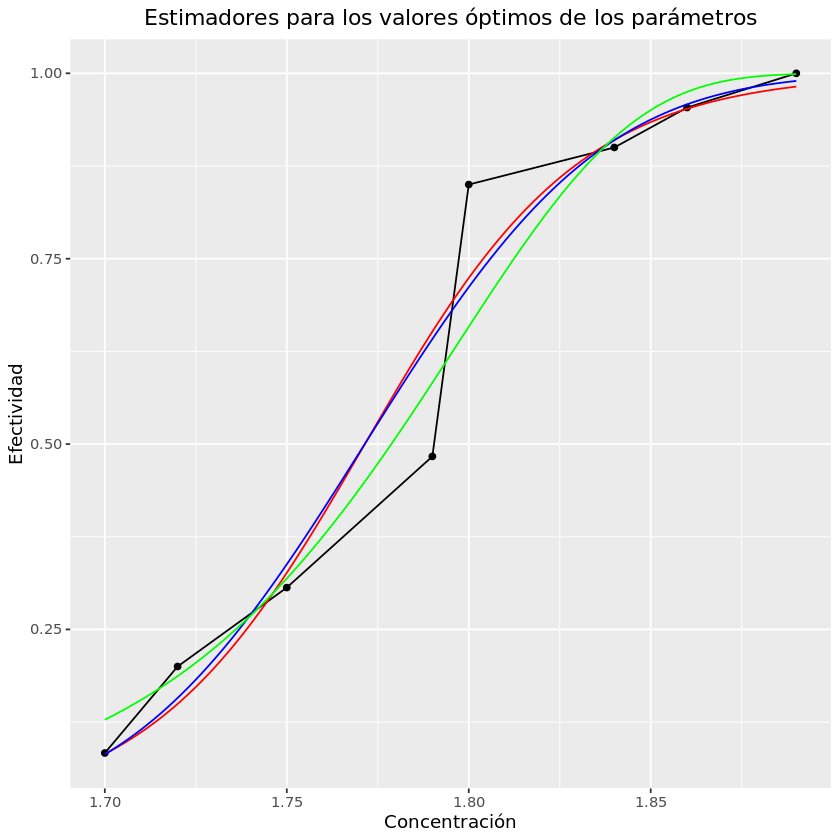

In [ ]:
print("En negro se presentan los datos originales, y en rojo, azul y verde los estimadores logistic, probit y loglog respectivamente.")

# Graficamos lo pedido
pp + geom_function(aes(concentracion), fun = function(concentracion) logistic(alfa1,beta1,concentracion), color = "red") +
    geom_function(aes(concentracion), fun = function(concentracion) probit(alfa2,beta2,concentracion), color = "blue") +
    geom_function(aes(concentracion), fun = function(concentracion) loglog(alfa3,beta3,concentracion), color = "green") +
    ggtitle("Estimadores para los valores óptimos de los parámetros") +
    theme(plot.title = element_text(hjust = 0.5))

**7.-** Considere ahora el método de los _momentos_. Asuma que es suficiente considerar, para un valor de $x$ fijo, la esperanza de $Y$ dado ese valor de $x$ para encontrar unos "buenos" parámetros a través del método de los momentos. Elija alguno de los 3 modelos a su gusto y estime un valor pertinente de los parámetros utilizando este "método de los momentos". Compare los resultados obtenidos con respecto al EMV ¿Cuál preferiría usar?.

_Hint: Considere, para un par de $x$ fijos bien elegidos, el valor de la esperanza, y con ello estime los parámetros_

**Respuesta:**

Consideramos el hint y tomamos $x_1=1.75$ y $x_2 =1.84$ convenientemente. Luego, usando el método de los momentos, calculamos la esperanza de la variable aleatoria $Y$ dados esos $x$. Por lo que venimos viendo, la variable aleatoria $Y$ es una Bernoulli de parámetro $p=\pi(\alpha,\beta,x)$ (i.e. tiene esperanza $p$), por lo que usando el método de los momentos se llegan a las siguientes ecuaciones (consideramos el modelo dado por $\bar{\pi}$ ):

$$\bar{\pi}(\alpha,\beta,1.75)=\frac{1}{n}\sum_{k=1}^ny_j \Longrightarrow \bar{\pi}(\alpha,\beta,1.75)=0.306$$ (para la concentración $1.75$)
$$\bar{\pi}(\alpha,\beta,1.84)=\frac{1}{n}\sum_{k=1}^ny_j \Longrightarrow \bar{\pi}(\alpha,\beta,1.75)=0.9$$ (para la concentración $1.84$)

Ahora, procedemos a resolver el sistema para encontrar $\alpha$ y $\beta$:

In [ ]:
if(!(require(nleqslv))){install.packages('nleqslv')}
library(nleqslv)

Loading required package: nleqslv



In [ ]:
# Resolvemos el sistema usando el paquete nleqslv:

equations <- function(vars) {
  y=numeric(2)
  y[1] <- loglog(vars[1], vars[2],1.75)-0.306
  y[2] <- loglog(vars[1], vars[2],1.84)-0.9
  y
}

xstart <- c(0,0)
fstart <- equations(xstart)

# Mostramos en pantalla los parámetros obtenidos
solution<-nleqslv(xstart, equations, control=list(btol=.01))$x
print(solution)


[1] -36.80653  20.45683


---

**Q:** Elija alguno de los 3 modelos a su gusto y estime un valor pertinente de los parámetros utilizando este "método de los momentos". Compare los resultados obtenidos con respecto al EMV ¿Cuál preferiría usar?.

**R:**Como se ve, la solución del sistema es $\alpha=-36.80653$ y $\beta=20.45683$. Si lo comparamos con los valores dados por el método de EMV, se tiene que ahí los valores para $\alpha$ y $\beta$ eran $-36.96235$ y $20.57411$ respectivamente, que en la práctica son muy parecidos. De esta manera, no importa mucho cuál estimador usemos (para este modelo al menos, aunque podría cambiar para los demás). Aún así, pensamos que es más recomendable utilizar EMV, ya que se consideran todos los experimentos hechos, mientras que para estimar el parámetro con el método de los momentos, solo consideramos los experimentos realizados con dos concentraciones distintas en vez de tomar todos los datos en cuenta, por lo que eventualmente podríamos estar perdiendo información relevante.

---

Toda la idea detrás de _estimar_ el parámetro que permita _explicar el comportamiento observado_ de la mejor manera posible, es que ahora disponemos de un modelo _probabilístico_ que podemos estudiar, y del cual podemos _samplear_ nuevos datos sin problemas
**8.-** Elija alguno de los parámetros _óptimos_ obtenidos en alguna de las preguntas anteriores (el que le parezca mejor) y en esta pregunta buscaremos _samplear_ "nuevas muestras" para interpolar nuestra curva de efectividad vs. concentración a nuevos valores de concentraciones. Para ello:

- Samplee $n=100$ uniformes entre 1.7 y 1.9 que representarán la concentración de la sustancia. Estas las llamaremos $\{x_k\}_{k=1}^{100}$. Para cada una de ellas, calcule $\pi_{\theta^*}(x_k) = \mathbb{P}(Y=1|x_k)$ utilizando su modelo preferido (con el parámetro _óptimo_ $\theta^* = (\alpha^{*}_i, \beta^{*}_i)$ que decidió al inicio de la pregunta). Estos serán los "nuevos puntos" en los que podremos entender el comportamiento de nuestro pesticida.

- Para cada uno de estos "nuevos puntos", samplee una bernoulli de parámetro $\pi_{\theta^*}(x_k)$ (esta corresponde a la v.a. $Y$ que determina si un escarabajo vive o no). Con esto hemos _simulado_ un nuevo experimento, asumiendo que nuestro modelo es correcto.

- Guarde en un data.frame los valores de las "nuevas concentraciones", así como de los $\texttt{nExpuestos}$, $\texttt{nMuertos}$ y $\texttt{efectividad}$ que obtuvo en los _experimentos simulados_.

- Grafique la nueva curva de "efectividad según la concentración" para los experimentos simulados. En ese mismo gráfico incluya las curvas correspondientes a $\pi_\theta(x)$ para los otros modelos (i.e. los que NO eligió para _simular_ los experimentos), así como la curva de efectividad vs. concentración original. Comente sus resultados.


[1] "En negro se presentan los datos simulados, en color granate los datos originales, y en colores salmon y turqueza los"
[1] "estimadores probit y loglog con sus parámetros óptimos respectivamente."


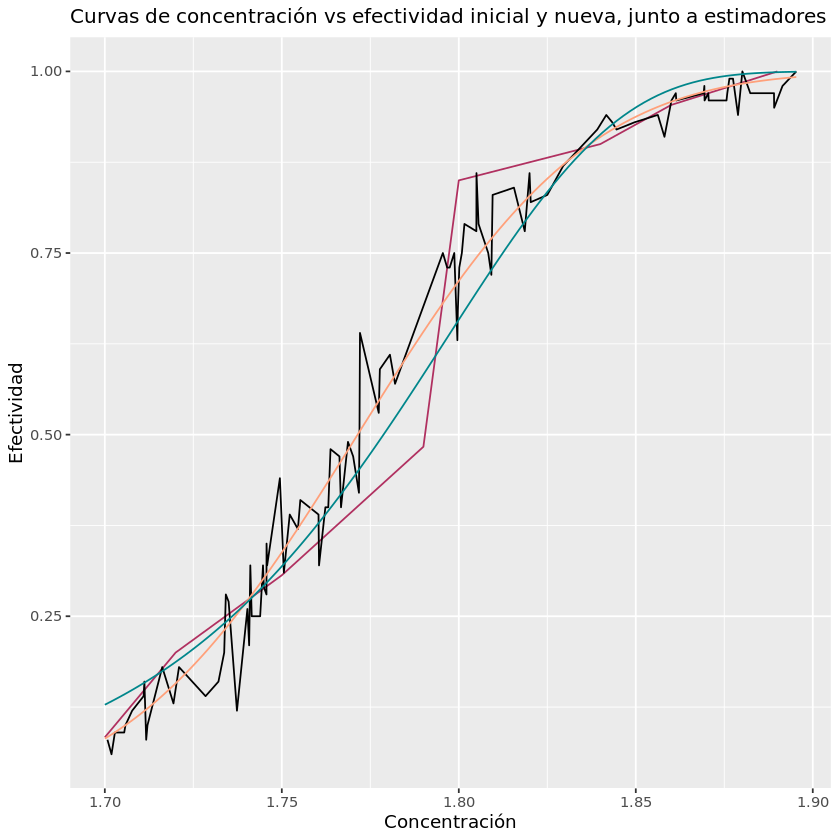

In [ ]:
# Elegimos la función "logistic"

# Sampleamos las n = 100 uniformes entre 1.7 y 1.9
n = 100
Unif<-runif(n,1.7,1.9)

# Calculamos la efectividad teórica
theo_effectiv<-numeric(n)
for (i in 1:n){
    theo_effectiv[i] = logistic(alfa1,beta1,Unif[i])
}

# Sampleamos las Bernoulli (exponemos a 190 individuos a cada concentración)
Bernoulli.matrix<-matrix(0,n,n)
for (i in 1:n){
    for (j in 1:n){
        Bernoulli.matrix[i,j] = rbinom(1,1,theo_effectiv[i])
    }
}

# Vemos la cantidad de muertos por una concentración dada
nMuertos<-numeric(n)
for (i in 1:n){
    for (j in 1:n){
        nMuertos[i] = nMuertos[i] + Bernoulli.matrix[i,j]
    }
}

# Vemos la efectividad (real) de una concentración dada
real_effectiv<-numeric(n)
for (i in 1:n){
    real_effectiv[i] = nMuertos[i]/100
}

# Guardamos todo en un data frame
df.final<-data.frame("Concentración" = Unif, "nExpuestos" = c(100), "nMuertos"=nMuertos, "Efectividad" = real_effectiv)

print("En negro se presentan los datos simulados, en color granate los datos originales, y en colores salmon y turqueza los")
print("estimadores probit y loglog con sus parámetros óptimos respectivamente.")

# Graficamos
ggplot() +
geom_line(data=datos.pesticida, aes(x=concentracion, y=efectividad), color='maroon') +
geom_line(data=df.final, aes(x=Concentración, y=Efectividad), color = 'black') +
geom_function(fun = function(concentracion) probit(alfa2,beta2,concentracion), color = "lightsalmon") +
geom_function(fun = function(concentracion) loglog(alfa3,beta3,concentracion), color = "turquoise4") +
labs(
    title='Curvas de concentración vs efectividad inicial y nueva, junto a estimadores',
    x = "Concentración",
    y = "Efectividad"
) +
theme(plot.title = element_text(size = 12))



Como comentario de las curvas graficadas, podemos notar que el experimento simulado se asemeja de gran manera a los datos originales, al igual que las curvas de los estimadores, lo cual verifica que los $3$ estimadores sirven para estimar el parámetro que estaba detrás de la curva de los datos originales.

**9.-** Hemos visto que los 3 modelos permiten _explicar_ relativamente bien las observaciones ¿Cuál podría ser una buena estrategia para determinar cuál de los tres modelos se ajusta mejor a las observaciones realizadas? ¿Con cuál se quedarían ustedes?

**Respuesta:**

Según nuestro punto de vista, una buena estrategia para determinar cuál de los tres modelos se ajusta mejor a las observaciones realizadas (o en general saber qué modelo se ajusta mejor a una serie de observaciones realizadas de cualquier experimento), sería tener $2$ cosas en consideración. Primero, creemos que es importante que nuestro modelo pase por una buena cantidad de puntos del experimento original. Es decir, que tanto nuestro modelo como el experimento original al reemplazar valores nos den exactamente (o casi) los mismos resultados para al menos un punto. Y otra cosa que creemos que hay que tener en cuenta, es qué tanto se alejan los datos del modelo de los datos originales en los puntos en los que no son iguales. Esto pues puede que un modelo pase exactamente por una serie de puntos (por ejemplo el inicial y el final), pero que en los otros lados de la distribución sea una curva que se aleje demasiado de las observaciones realizadas originalmente. De esta manera, créemos que el modelo que mejor se ajusta a nuestras observaciones y que por ende, mejor calcula nuestro parámetro original es el modelo dado por el estimador $\hat{\pi}$, o sea, la función probit.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a05167b5-a5ea-492f-b37a-264b99f6ae3e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>